In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bike_buyers = pd.read_csv('../Data/bike_buyers.csv')

In [4]:
# show all the data from bike_buyers
bike_buyers

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


<h2>Análisis de HomeOwner, Cars y Children</h1>
<ul>
    <li><strong>HomeOwner</strong>: esta variable indica si el sujeto es o no es dueño de una casa, por eso los
    valores <em>"Yes"</em> y <em>"No"</em>.</li>
    <li><strong>Cars</strong>: esta variable indica la cantidad de carros que tiene el sujeto.</li>
    <li><strong>Children</strong>: esta variable indica la cantidad de hijos que tiene el sujeto.</li>
</ul>

<h3>Analizando Home Owner con Children</h3>
<p>Lo que queremos encontrar mediante este análisis es la relación que existe entre
ser dueño de una casa y tener hijos.</p>

/tmp/ipykernel_17885/1305230340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_buyers.groupby('Home Owner').sum()['Children'].plot(kind='bar', title='Number of Children per Home Owner',


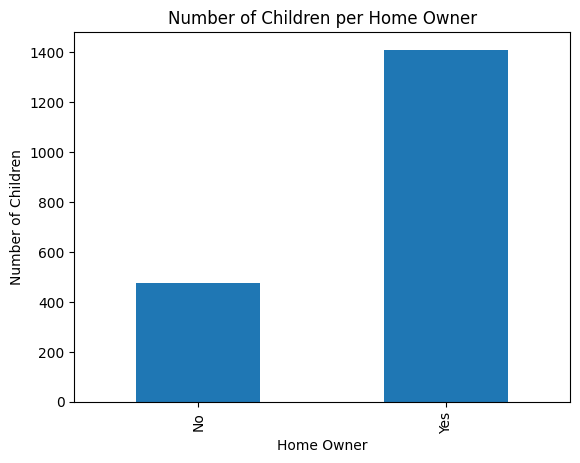

In [5]:
bike_buyers.groupby('Home Owner').sum()['Children'].plot(kind='bar', title='Number of Children per Home Owner',
                                                        xlabel='Home Owner', ylabel='Number of Children')
plt.show()

<p>Como podemos evidenciar, hay una tendencia en cuanto a ser dueño de una casa y la cantidad de niños. 
Los Home Owner presentan tener 900 hijos más que la negación de esta categoría.</p> 

<h3>Analizando Home Owner con Cars</h3>
<p>Este análisis, como el anterior, tiene la misión de hallar una relación entre ser dueño de una casa y la de tener un carro.</p>

/tmp/ipykernel_27228/2810846919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_buyers.groupby('Home Owner').sum()['Cars'].plot(kind='bar',xlabel='Home Owner',ylabel='Number of Cars',title='Number of Cars per Home Owner')


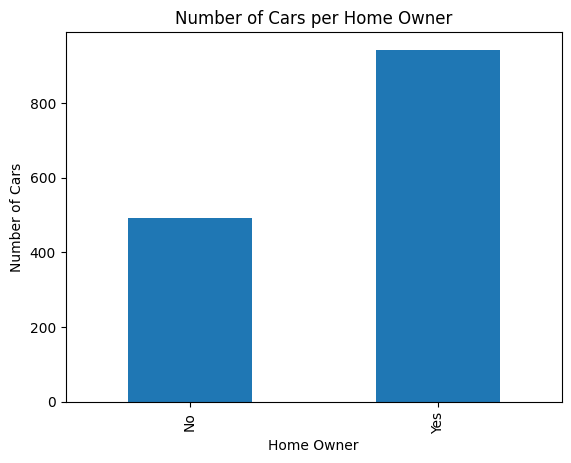

In [78]:
bike_buyers.groupby('Home Owner').sum()['Cars'].plot(kind='bar',xlabel='Home Owner',ylabel='Number of Cars',title='Number of Cars per Home Owner')
plt.show()

<p>Una vez más podemos identificar la tendencia de que los dueños de una casa suelen estar en mayor posesión de carros
que los de la otra categoría</p>

<h3>Analizando Cars y Children</h3>
<p> Este análisis trata determinar el número de Familias con hijos en relación a la cantidad de carros que poseen.</p>

/tmp/ipykernel_27228/3357979863.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_buyers.groupby('Cars').sum()['Children'].plot(kind='bar',xlabel='Number of Cars',ylabel='Number of Children',


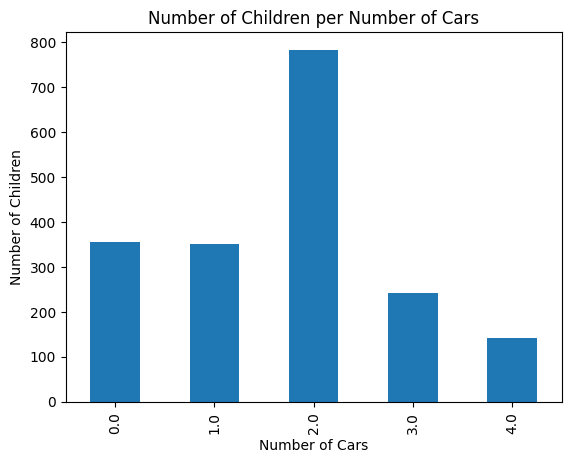

In [79]:
#show bar graph of number of children per people who owns a car
bike_buyers.groupby('Cars').sum()['Children'].plot(kind='bar',xlabel='Number of Cars',ylabel='Number of Children',
                                                   title='Number of Children per Number of Cars')
plt.show()

<p> Como se puede evidenciar las personas que poseen 2 carros tienen la mayor cantidad de hijos.
Este número decae de mayor manera en cuanto a más carros poseen.</p>

<h2>Análisis de ConmuteDistance y Home Owner</h2>
<ul>
    <li><strong>ConmuteDistance</strong>: esta variable indica la distancia la casa del comprador y la compañia del vendedor.
    Hay 5 categorías <em>0-1, 1-2, 2-5, 5-10, 10+</em> millas de distancia.</li>
    <li><strong>HomeOwner</strong>: esta variable indica si el sujeto es o no es dueño de una casa, por eso los
    valores <em>"Yes"</em> y <em>"No"</em>.</li>
</ul>

<h3>Analizando ConmuteDistance y Home Owner</h3>

/tmp/ipykernel_27228/501528750.py:3: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  bike_buyers['Commute Distance'].cat.categories = ['0-1', '1-2', '2-5', '5-10', '10+']


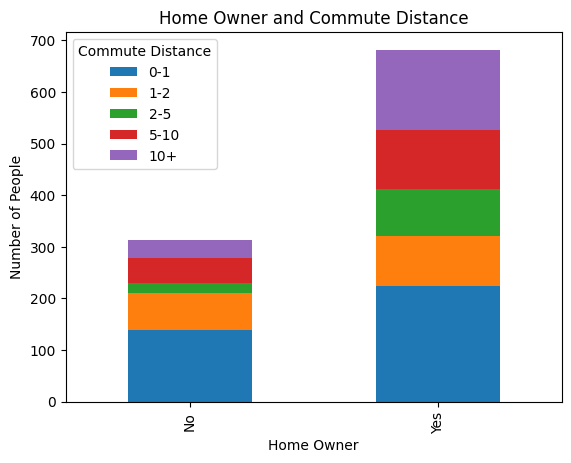

In [89]:
#make conmute distance into a category
bike_buyers['Commute Distance'] = bike_buyers['Commute Distance'].astype('category')
bike_buyers['Commute Distance'].cat.categories = ['0-1', '1-2', '2-5', '5-10', '10+']
#show home owner and commute distance in a bar graph
bike_buyers.groupby(['Home Owner', 'Commute Distance']).size().unstack().plot(kind='bar',stacked=True,
                                                                                title='Home Owner and Commute Distance',ylabel='Number of People')
plt.show()

<p>Este gráfico stackeado nos indica la cantidad de personas que caen en las 5 categorías de commute distance, según si son Home Owners o no.
Podemos inferir que el hecho la mayoría de personas viven bastante lejos a la compañía del comprador, especialmente los homeowners.</p>

<h2>Análisis de variables a criterio propia</h2>
<p>Para el análisis a criterio propio, las variables usadas serán Education y Purchased bike.
Trataremos identificar alguna relación entre las categorías de Education y si es que han comprado una bicicleta para saber a que grupo de personas
le conviene dirigir alguna publicidad.</p>

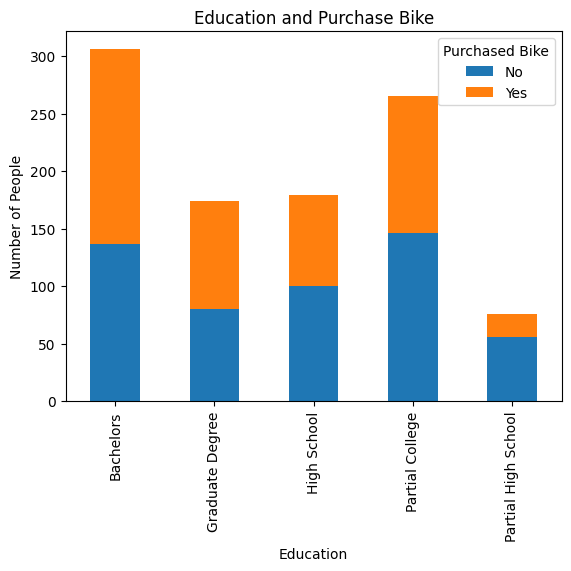

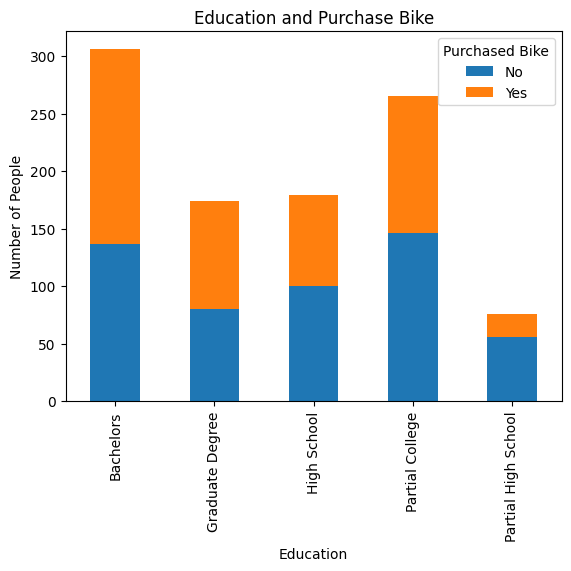

In [100]:
#show graph of Education and purchase bike
bike_buyers.groupby(['Education', 'Purchased Bike']).size().unstack().plot(kind='bar',stacked=True,
                                                                                title='Education and Purchase Bike',ylabel='Number of People')

plt.show()
#print how many bachelos have purchased bike
print('Number of Bachelors who have purchased bike: ',bike_buyers[(bike_buyers['Education'] == 'Bachelors') & (bike_buyers['Purchased Bike'] == 'Yes')].shape[0])


<p>Podemos notar una clara diferencia en cuanto a la compra de bicicletas dentro las personas con un mismo grado de educación.
Además, notamos que las personas que más han comprado bicicletas son Bachelors y es donde mayor diferencia hay entre las dos categorías.</br>
</p>